In [117]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics as stats
from sklearn import linear_model

In [118]:
fifa = pd.read_csv('fifa21_male2.csv', low_memory=False)

In [119]:
fifa.isna().sum()

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

Looked at various metrics to decide which nationality to choose

In [175]:
max_ratings_by_nationality = fifa.groupby('Nationality')['OVA'].max()

max_ratings_by_nationality = max_ratings_by_nationality.reset_index()

max_ratings_by_nationality = max_ratings_by_nationality.sort_values(by='OVA', ascending=False)

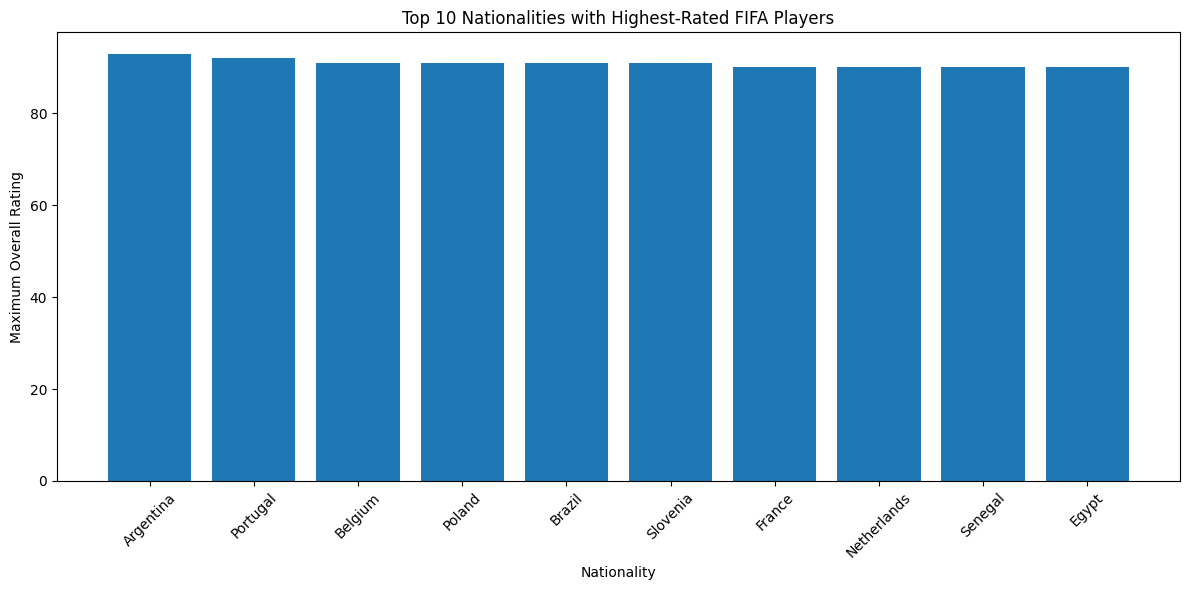

In [176]:
plt.figure(figsize=(12, 6))
plt.bar(max_ratings_by_nationality['Nationality'][:10], max_ratings_by_nationality['OVA'][:10])
plt.xlabel('Nationality')
plt.ylabel('Maximum Overall Rating')
plt.title('Top 10 Nationalities with Highest-Rated FIFA Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
player_count_by_nationality = fifa['Nationality'].value_counts().reset_index()
player_count_by_nationality.columns = ['Nationality', 'Player Count']

# Sort the data to have the highest player counts at the top
player_count_by_nationality = player_count_by_nationality.sort_values(by='Player Count', ascending=False)
player_count_by_nationality

,Nationality,Player Count
0,England,1707
1,Germany,1154
2,Spain,1121
3,France,990
4,Brazil,857
5,Argentina,778
6,Italy,565
7,Netherlands,475
8,Portugal,365
9,United States,358


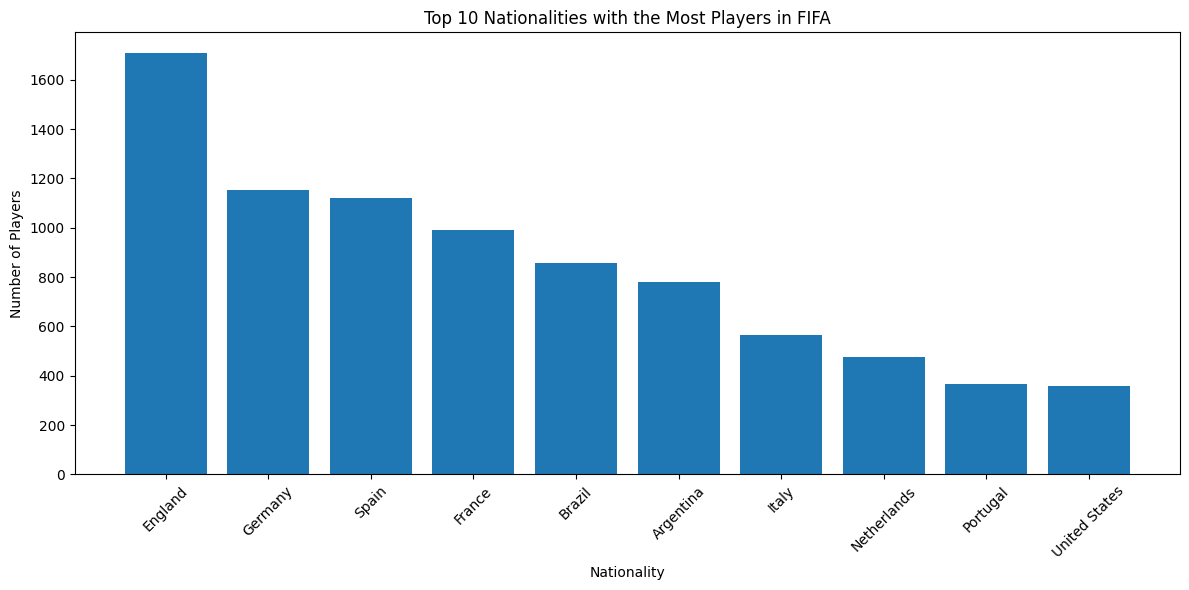

In [178]:
plt.figure(figsize=(12, 6))
plt.bar(player_count_by_nationality['Nationality'][:10], player_count_by_nationality['Player Count'][:10])
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top 10 Nationalities with the Most Players in FIFA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [120]:
#decided on England
english_fifa = fifa[fifa['Nationality'] == 'England']

In [121]:
english_fifa.isna().sum()

ID                     0
Name                   0
Age                    0
OVA                    0
Nationality            0
Club                   1
BOV                    0
BP                     0
Position              44
Player Photo           0
Club Logo              1
Flag Photo             0
POT                    0
Team & Contract        0
Height                 0
Weight                 0
foot                   0
Growth                 0
Joined                 1
Loan Date End       1576
Value                  0
Wage                   0
Release Clause         0
Contract               0
Attacking              0
Crossing               0
Finishing              0
Heading Accuracy       0
Short Passing          0
Volleys                1
Skill                  0
Dribbling              0
Curve                  1
FK Accuracy            0
Long Passing           0
Ball Control           0
Movement               0
Acceleration           0
Sprint Speed           0
Agility                1


In [122]:
english_fifa.duplicated().sum()

0

In [123]:
english_fifa[['Contract Start', 'Contract End']] = english_fifa['Contract'].apply(lambda x: pd.Series(x.split(' ~ ')))

C:\Users\chris\AppData\Local\Temp\ipykernel_28992\3086220290.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  english_fifa[['Contract Start', 'Contract End']] = english_fifa['Contract'].apply(lambda x: pd.Series(x.split(' ~ ')))
C:\Users\chris\AppData\Local\Temp\ipykernel_28992\3086220290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_fifa[['Contract Start', 'Contract End']] = english_fifa['Contract'].apply(lambda x: pd.Series(x.split(' ~ ')))
C:\Users\chris\AppData\Local\Temp\ipykernel_28992\3086220290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [124]:
english_fifa.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

In [125]:
fifa_cleaned = english_fifa[['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BP', 'POT', 'Height', 'Weight', 'foot', 'Value', 'Wage', 'Release Clause', 'Contract', 'Total Stats', 'Power', 'Mentality', 'Defending', 'Movement']]

In [126]:
fifa_cleaned

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,foot,Value,Wage,Release Clause,Contract,Total Stats,Power,Mentality,Defending,Movement
2,27,J. Cole,33,71,England,Coventry City,CAM,71,"5'9""",161lbs,Right,€1.1M,€15K,€0,2016 ~ 2020,1770,284,317,99,295
8,244,G. Neville B,35,76,England,Manchester United,CB,82,"5'10""",174lbs,Right,€0,€0,€0,1991 ~ 2011,1774,284,319,242,324
9,246,P. Scholes,37,80,England,Manchester United,CAM,80,"5'7""",157lbs,Right,€400K,€40K,€0,1993 ~ 2013,2065,333,417,143,338
10,249,P. Neville,35,74,England,Everton,CB,74,"5'11""",168lbs,Right,€120K,€7K,€0,2005 ~ 2013,1868,349,335,224,321
11,250,D. Beckham,37,78,England,NaN,CM,78,"6'0""",165lbs,Right,€0,€0,€0,England Free,2012,372,367,150,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17056,258904,J. Flanagan,17,55,England,Northampton Town,CB,69,"6'0""",154lbs,Right,€150K,€500,€356K,2020 ~ 2021,1364,270,223,160,298
17095,259031,L. Delap,17,61,England,Manchester City,ST,82,"6'1""",159lbs,Right,€550K,€3K,€1.6M,2020 ~ 2023,1493,303,217,55,343
17096,259032,T. Jenks,18,54,England,Brighton & Hove Albion,CB,71,"6'3""",176lbs,Right,€140K,€3K,€354K,2019 ~ 2023,1543,298,262,169,255
17105,259063,R. Fenlon,18,53,England,Accrington Stanley,RM,70,"5'8""",141lbs,Right,€120K,€500,€285K,2020 ~ 2022,1470,218,231,121,343


Created start and end contract columns

In [127]:
fifa_cleaned[['Contract Start', 'Contract End']] = fifa_cleaned['Contract'].apply(lambda x: pd.Series(x.split(' ~ ')))

C:\Users\chris\AppData\Local\Temp\ipykernel_28992\1078534246.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  fifa_cleaned[['Contract Start', 'Contract End']] = fifa_cleaned['Contract'].apply(lambda x: pd.Series(x.split(' ~ ')))
C:\Users\chris\AppData\Local\Temp\ipykernel_28992\1078534246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_cleaned[['Contract Start', 'Contract End']] = fifa_cleaned['Contract'].apply(lambda x: pd.Series(x.split(' ~ ')))
C:\Users\chris\AppData\Local\Temp\ipykernel_28992\1078534246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [128]:
fifa_cleaned.drop(['Contract'], axis=1, inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_28992\3543287271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_cleaned.drop(['Contract'], axis=1, inplace=True)


In [129]:
numeric_column = pd.to_numeric(fifa_cleaned['Contract Start'], errors='coerce')

In [130]:
non_numeric_rows = fifa_cleaned[numeric_column.isna()]

In [131]:
fifa_cleaned = fifa_cleaned.drop(index=non_numeric_rows.index)

Cleaned height and weight columns

In [132]:
fifa_cleaned['Weight'] = fifa_cleaned['Weight'].str.extract('(\d+)').astype(int)

In [133]:
fifa_cleaned.rename(columns={'foot': 'Foot'}, inplace=True)

In [134]:
def height_to_inches(height):
    feet, inches = map(int, height.replace('"', '').split("'"))
    total_inches = (feet * 12) + inches
    return total_inches

In [135]:
fifa_cleaned['Height'] = fifa_cleaned['Height'].apply(height_to_inches)

In [136]:
fifa_cleaned

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
2,27,J. Cole,33,71,England,Coventry City,CAM,71,69,161,...,€1.1M,€15K,€0,1770,284,317,99,295,2016,2020
8,244,G. Neville B,35,76,England,Manchester United,CB,82,70,174,...,€0,€0,€0,1774,284,319,242,324,1991,2011
9,246,P. Scholes,37,80,England,Manchester United,CAM,80,67,157,...,€400K,€40K,€0,2065,333,417,143,338,1993,2013
10,249,P. Neville,35,74,England,Everton,CB,74,71,168,...,€120K,€7K,€0,1868,349,335,224,321,2005,2013
13,388,S. Campbell,35,75,England,Newcastle United,CB,79,74,190,...,€0,€0,€0,1581,319,296,222,321,2010,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17056,258904,J. Flanagan,17,55,England,Northampton Town,CB,69,72,154,...,€150K,€500,€356K,1364,270,223,160,298,2020,2021
17095,259031,L. Delap,17,61,England,Manchester City,ST,82,73,159,...,€550K,€3K,€1.6M,1493,303,217,55,343,2020,2023
17096,259032,T. Jenks,18,54,England,Brighton & Hove Albion,CB,71,75,176,...,€140K,€3K,€354K,1543,298,262,169,255,2019,2023
17105,259063,R. Fenlon,18,53,England,Accrington Stanley,RM,70,68,141,...,€120K,€500,€285K,1470,218,231,121,343,2020,2022


In [137]:
#renamed dataframe
england_players = fifa_cleaned

Converted all monetary values to be unabbreviated

In [138]:
england_players['Value'] = england_players['Value'].str.replace("€", "")
england_players['Wage'] = england_players['Wage'].str.replace("€", "")
england_players['Release Clause'] = england_players['Release Clause'].str.replace("€", "")
england_players['Value'] = england_players['Value'].str.replace("K", "000")

In [139]:
def millions_conversion(number):
    if "." in number:
        number = number.replace(".", "")
        number = number.replace("M", "00000")
    else:
        number = number.replace("M", "000000")
    return int(number)

In [140]:
england_players['Value'] = england_players['Value'].apply(millions_conversion)

In [141]:
england_players['Wage'] = england_players['Wage'].str.replace("K", "000")

In [142]:
england_players['Release Clause'] = england_players['Release Clause'].str.replace("K", "000")
england_players['Release Clause'] = england_players['Release Clause'].apply(millions_conversion)

In [143]:
england_players[['Value','Wage','Release Clause']] = england_players[['Value','Wage','Release Clause']].astype(int)
england_players['BP'] = england_players['BP'].str.replace("CB", "Defender")
england_players['BP'] = england_players['BP'].str.replace("ST", "Central")
england_players['BP'] = england_players['BP'].str.replace("CAM", "Central")
england_players['BP'] = england_players['BP'].str.replace("GK", "Goalkeeper")
england_players['BP'] = england_players['BP'].str.replace("RM", "Central")
england_players['BP'] = england_players['BP'].str.replace("CDM", "Defender")
england_players['BP'] = england_players['BP'].str.replace("CM", "Central")
england_players['BP'] = england_players['BP'].str.replace("LB", "Defender")
england_players['BP'] = england_players['BP'].str.replace("RB", "Defender")
england_players['BP'] = england_players['BP'].str.replace("LM", "Central")
england_players['BP'] = england_players['BP'].str.replace("LWB", "Winger")
england_players['BP'] = england_players['BP'].str.replace("RWB", "Winger")
england_players['BP'] = england_players['BP'].str.replace("LW", "Winger")
england_players['BP'] = england_players['BP'].str.replace("CF", "Central")
england_players['BP'] = england_players['BP'].str.replace("RW", "Winger")

Found correlations

In [144]:
fifa_corr = england_players.corr(numeric_only=True)

<Axes: >

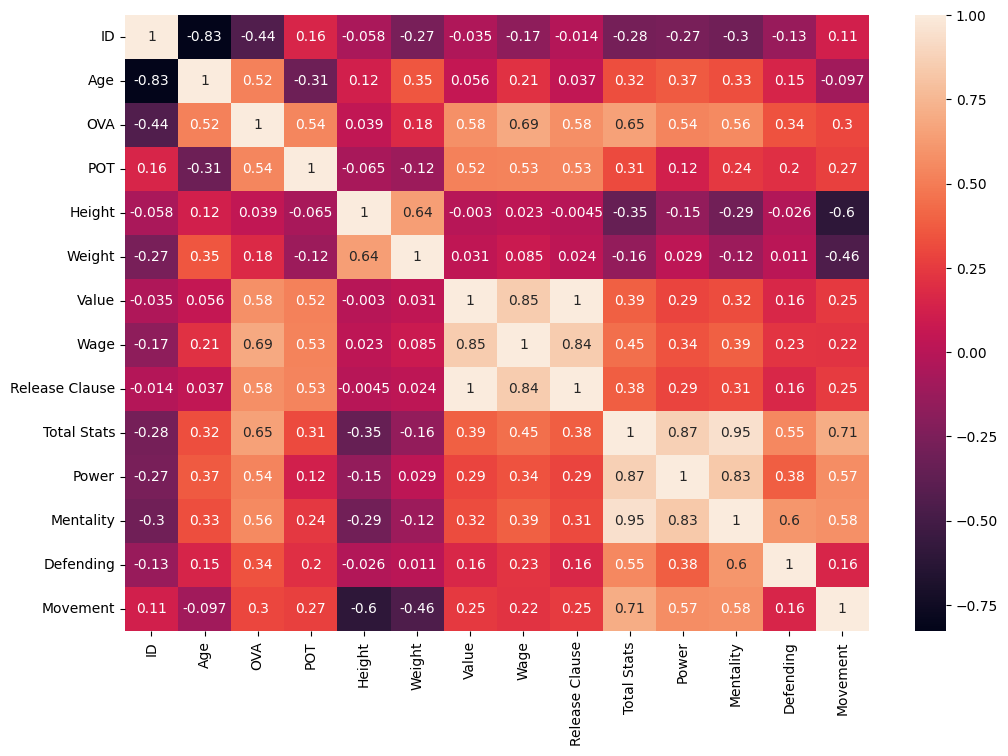

In [145]:
plt.figure(figsize=(12, 8))
sns.heatmap(fifa_corr, annot=True)

Created various scatter plots

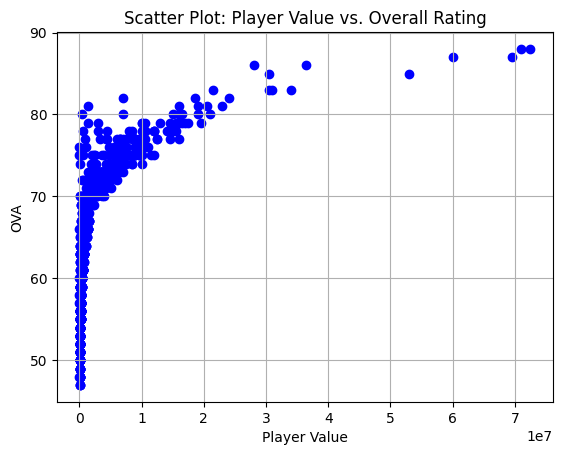

In [146]:
plt.figure()
plt.scatter(england_players['Value'], england_players['OVA'], color='blue')
plt.title('Scatter Plot: Player Value vs. Overall Rating')
plt.xlabel('Player Value')
plt.ylabel('OVA')
plt.grid(True)
plt.show()

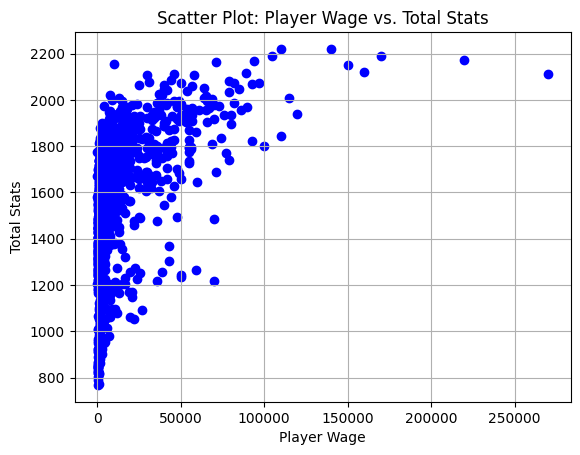

In [147]:
plt.figure()
plt.scatter(england_players['Wage'], england_players['Total Stats'], color='blue')
plt.title('Scatter Plot: Player Wage vs. Total Stats')
plt.xlabel('Player Wage')
plt.ylabel('Total Stats')
plt.grid(True)
plt.show()

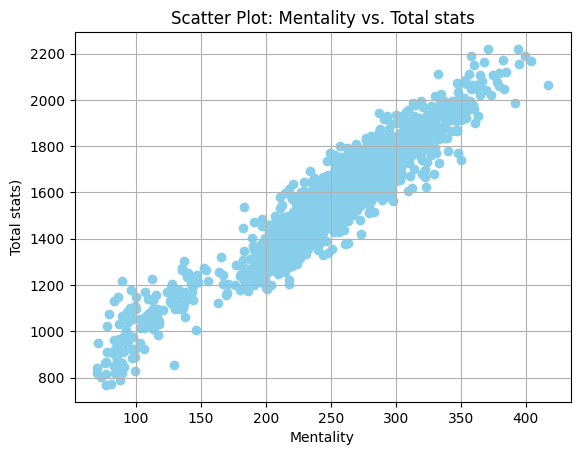

In [148]:
plt.figure()
plt.scatter(england_players['Mentality'], england_players['Total Stats'], color='skyblue')
plt.title('Scatter Plot: Mentality vs. Total stats')
plt.xlabel('Mentality')
plt.ylabel('Total stats)')
plt.grid(True)
plt.show()

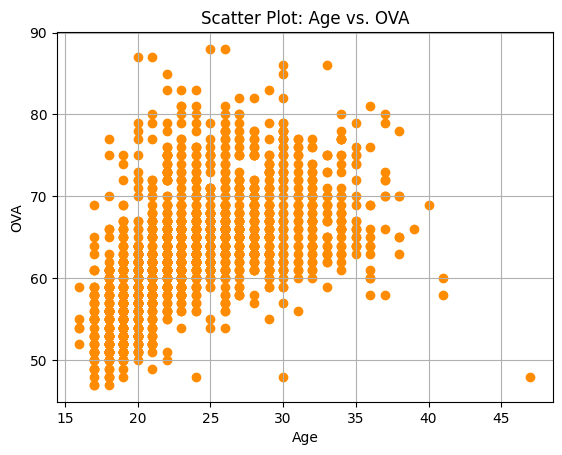

In [149]:
plt.figure()
plt.scatter(england_players['Age'], england_players['OVA'], color='darkorange')
plt.title('Scatter Plot: Age vs. OVA')
plt.xlabel('Age')
plt.ylabel('OVA')
plt.grid(True)
plt.show()

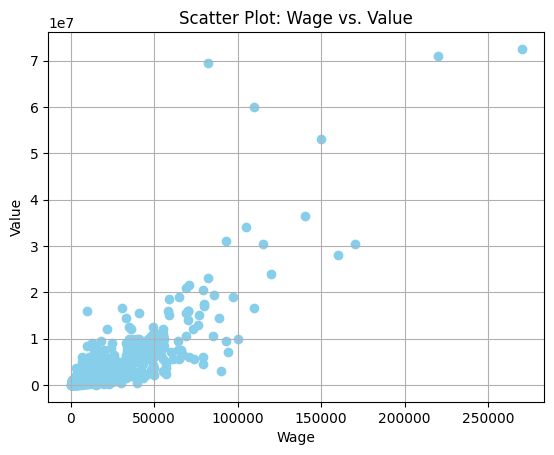

In [150]:
plt.figure()
plt.scatter(england_players['Wage'], england_players['Value'], color='skyblue')
plt.title('Scatter Plot: Wage vs. Value')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Created linear regression models for Age vs POT vs OVA

In [151]:
model = linear_model.LinearRegression()

In [152]:
age_stats = england_players[['Age', 'OVA']]

In [153]:
X = age_stats.drop('Age', axis=1)
y = age_stats['Age']

X.head()

,OVA
2,71
8,76
9,80
10,74
13,75


In [154]:
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 1.464088050118388
Coefficient: [0.35764645]


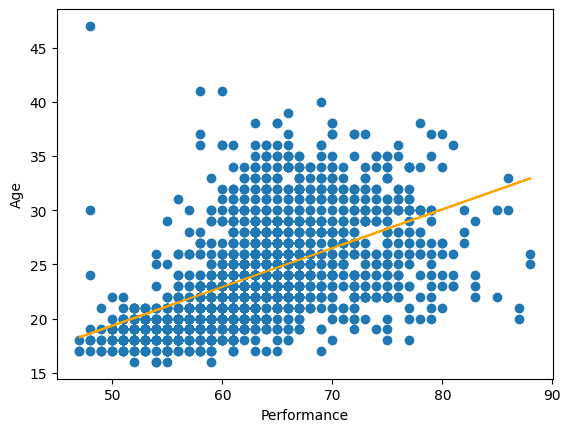

In [155]:
# Create regression line equation
regression_line = result.intercept_ + age_stats.OVA * result.coef_
plt.plot(age_stats.OVA, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(age_stats.OVA, age_stats.Age)
plt.xlabel('Performance')
plt.ylabel('Age')
plt.show()

In [156]:
model.score(X, y)

0.2676040612071703

In [157]:
model2 = linear_model.LinearRegression()

In [158]:
performance_potential = england_players[['POT', 'Age']]

In [159]:
X = performance_potential.drop('POT', axis=1)
y = performance_potential['POT']

X.head()

,Age
2,33
8,35
9,37
10,35
13,35


In [160]:
result2 = model2.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 1.464088050118388
Coefficient: [0.35764645]


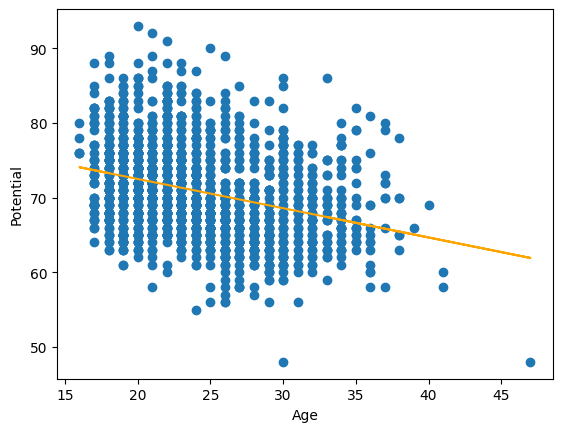

In [161]:
# Create regression line equation
regression_line = result2.intercept_ + performance_potential.Age * result2.coef_
plt.plot(performance_potential.Age, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(performance_potential.Age, performance_potential.POT)
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

In [162]:
model2.score(X, y)

0.09867959899544909

In [163]:
model3 = linear_model.LinearRegression()

In [164]:
age_stats = england_players[['POT', 'OVA']]

In [165]:
X = age_stats.drop('POT', axis=1)
y = age_stats['POT']

X.head()

,OVA
2,71
8,76
9,80
10,74
13,75


In [166]:
result3 = model3.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 1.464088050118388
Coefficient: [0.35764645]


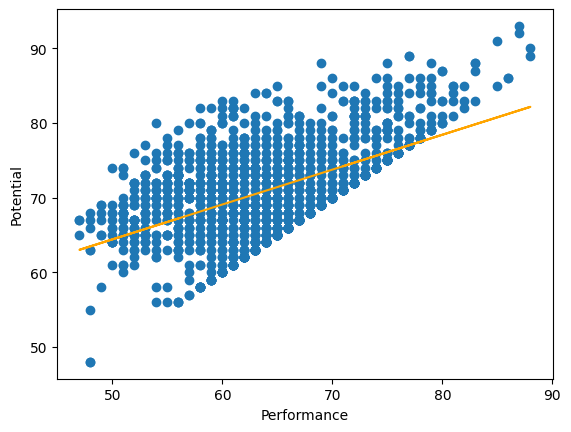

In [167]:
# Create regression line equation
regression_line = result3.intercept_ + age_stats.OVA * result3.coef_
plt.plot(age_stats.OVA, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(age_stats.OVA, age_stats.POT)
plt.xlabel('Performance')
plt.ylabel('Potential')
plt.show()

In [168]:
model3.score(X, y)

0.2931861836936117

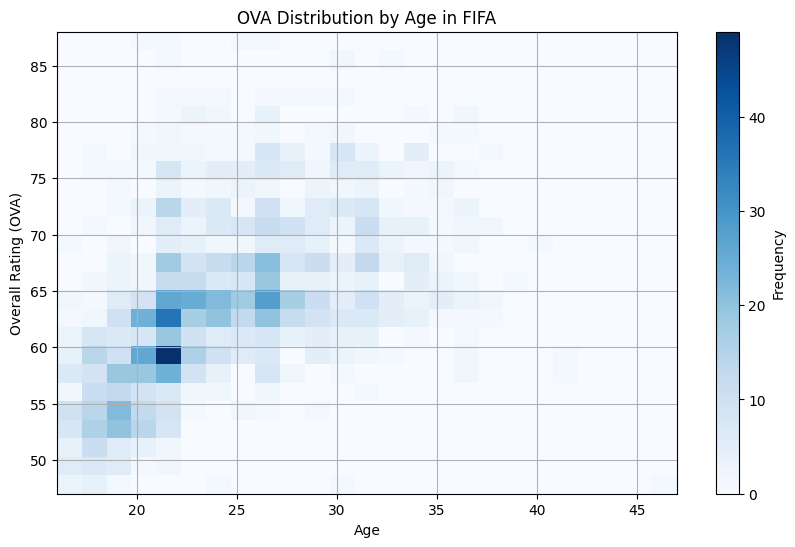

In [169]:
plt.figure(figsize=(10, 6))
plt.hist2d(england_players['Age'], england_players['OVA'], bins=(25, 25), cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('OVA Distribution by Age in FIFA')
plt.xlabel('Age')
plt.ylabel('Overall Rating (OVA)')
plt.grid(True)
plt.show()

In [170]:
#looked at average wage budgets of real UK-based teams
team_wages = [222984000, 169720000, 163060000, 141782000, 101344000, 85490000, 78780000, 75232000, 70160000, 62610000, 59180000, 43120000, 38310000, 37610000, 35380000, 32044000, 28590000, 28340000, 17300000, 15240000]
print(np.mean(team_wages))
print(np.median(team_wages))

75313800.0
60895000.0


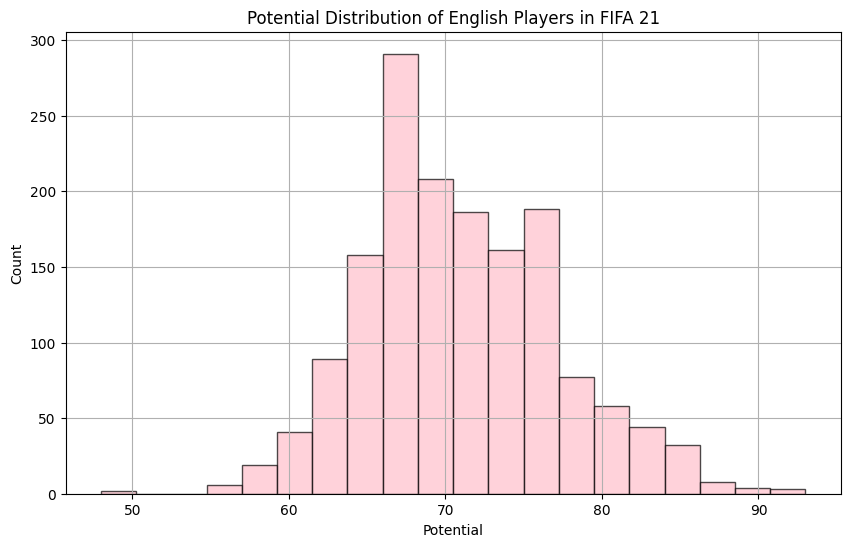

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(england_players['POT'], bins=20, edgecolor='k', alpha=0.7, color='pink')
plt.xlabel('Potential')
plt.ylabel('Count')
plt.title('Potential Distribution of English Players in FIFA 21')
plt.grid(True)

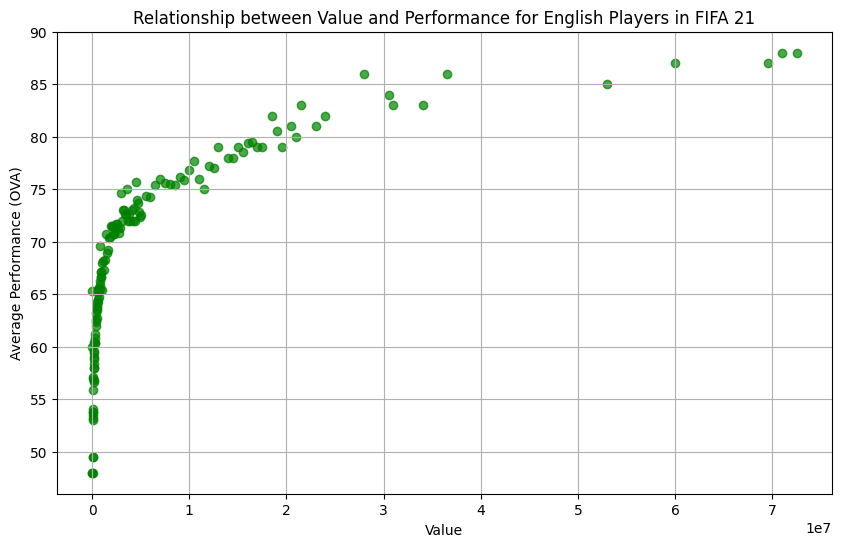

In [173]:
value_performance = england_players.groupby('Value')['OVA'].mean().reset_index()
# Create a scatter plot to visualize the relationship between "Value" and "Performance"
plt.figure(figsize=(10, 6))
plt.scatter(value_performance['Value'], value_performance['OVA'], color='green', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Average Performance (OVA)')
plt.title('Relationship between Value and Performance for English Players in FIFA 21')
plt.grid(True)
plt.show()

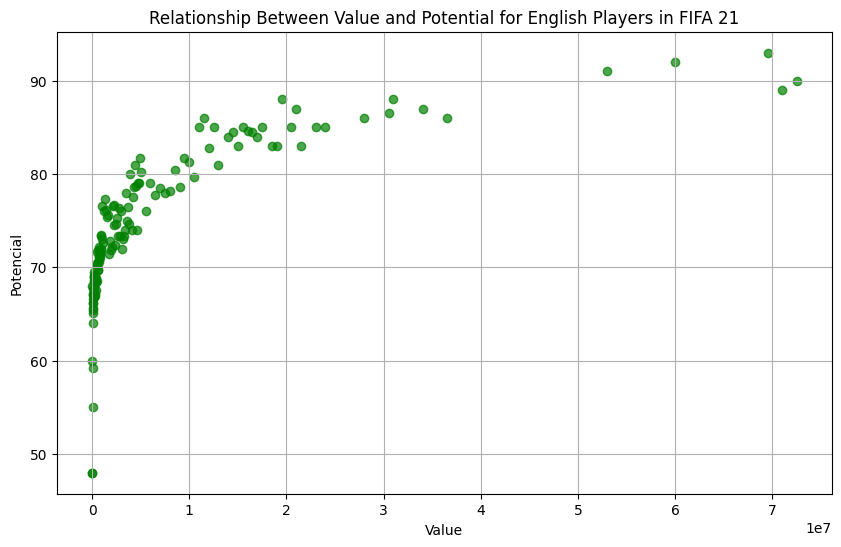

In [174]:
value_pot = england_players.groupby('Value')['POT'].mean().reset_index()
# Create a scatter plot to visualize the relationship between "Value" and "Wage"
plt.figure(figsize=(10, 6))
plt.scatter(value_pot['Value'], value_pot['POT'], color='green', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Potencial')
plt.title('Relationship Between Value and Potential for English Players in FIFA 21')
plt.grid(True)
plt.show()

Finding multiple linear regression to determine wages

In [179]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model

In [181]:
england_players

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
2,27,J. Cole,33,71,England,Coventry City,Central,71,69,161,...,1100000,15000,0,1770,284,317,99,295,2016,2020
8,244,G. Neville B,35,76,England,Manchester United,Defender,82,70,174,...,0,0,0,1774,284,319,242,324,1991,2011
9,246,P. Scholes,37,80,England,Manchester United,Central,80,67,157,...,400000,40000,0,2065,333,417,143,338,1993,2013
10,249,P. Neville,35,74,England,Everton,Defender,74,71,168,...,120000,7000,0,1868,349,335,224,321,2005,2013
13,388,S. Campbell,35,75,England,Newcastle United,Defender,79,74,190,...,0,0,0,1581,319,296,222,321,2010,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17056,258904,J. Flanagan,17,55,England,Northampton Town,Defender,69,72,154,...,150000,500,356000,1364,270,223,160,298,2020,2021
17095,259031,L. Delap,17,61,England,Manchester City,Central,82,73,159,...,550000,3000,1600000,1493,303,217,55,343,2020,2023
17096,259032,T. Jenks,18,54,England,Brighton & Hove Albion,Defender,71,75,176,...,140000,3000,354000,1543,298,262,169,255,2019,2023
17105,259063,R. Fenlon,18,53,England,Accrington Stanley,Central,70,68,141,...,120000,500,285000,1470,218,231,121,343,2020,2022


In [182]:
num = england_players.select_dtypes(np.number)

In [189]:
from sklearn.preprocessing import StandardScaler
num_scaled = pd.DataFrame(StandardScaler().fit_transform(num), columns=num.columns).drop('ID', axis=1)
num_scaled.describe().style.format('{:.2f}')

,Age,OVA,POT,Height,Weight,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement
count,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00,1575.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.67,-2.34,-3.70,-3.27,-2.72,-0.36,-0.52,-0.36,-3.24,-3.44,-3.06,-1.95,-3.58
25%,-0.86,-0.66,-0.78,-0.59,-0.65,-0.31,-0.42,-0.31,-0.52,-0.59,-0.45,-0.91,-0.49
50%,-0.26,-0.10,-0.14,0.18,-0.05,-0.26,-0.37,-0.27,0.07,0.05,0.09,0.32,0.16
75%,0.76,0.59,0.67,0.56,0.55,-0.17,-0.12,-0.16,0.70,0.69,0.64,0.78,0.69
max,4.60,3.39,3.59,3.24,5.30,14.11,12.97,13.85,2.61,2.82,2.78,2.00,2.85


In [192]:
from sklearn import linear_model

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.metrics import r2_score

In [207]:
X = num_scaled.drop('POT', axis=1)
y = num_scaled['POT']

In [208]:
# Fit model
model = linear_model.LinearRegression()
result = model.fit(X, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)


Intercept: -2.7653080985489705e-16
Coefficient: [-0.8279195   1.02932634 -0.07681407 -0.00373218 -0.72198939  0.10163031
  0.66302002 -0.18386655 -0.1631944   0.30343651 -0.03788377 -0.12022335]


In [209]:
result.score(X, y)

0.809334948928884

Created predicted model

In [215]:
features = ['OVA', 'POT', 'Age']
X = england_players[features]
y = england_players['Wage']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state to a fixed value. This means that if you or someone else runs the same code with the same dataset and the same random_state value
# Create a multiple linear regression model
model = LinearRegression()
# Fit the model to the training data
result = model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print model metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
# Predict wage for a specific player (replace with actual values)
sample_player = pd.DataFrame({'OVA': [77], 'POT': [89], 'Age': [21]})
predicted_wage = model.predict(sample_player)
print(f"Predicted Wage for Sample Player: {predicted_wage[0]}")

Mean Squared Error (MSE): 174366242.02999344
R-squared (R2): 0.5965254797014505
Predicted Wage for Sample Player: 43352.70646834298


In [206]:
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)


Intercept: -129080.91209691926
Coefficient: [1754.34564626  488.99462281 -293.88179174]


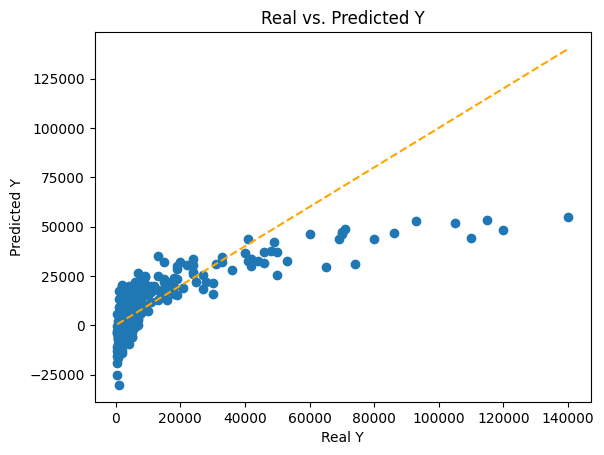

In [201]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Real Y')
plt.ylabel('Predicted Y')
plt.title('Real vs. Predicted Y')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linestyle='--')
plt.show()

Finding youngest players with highst OVA

In [216]:
max_Age = england_players.loc[england_players['Age'] == england_players['Age'].max()]
max_Age

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
277,53985,S. Royce,47,48,England,Gillingham,Goalkeeper,48,74,190,...,3000,700,5000,852,137,129,37,145,2019,2024


In [217]:
min_age_max_OVA= england_players.loc[england_players['OVA'] == england_players['OVA'].max()][['Name', 'Age', 'OVA']]
min_age_max_OVA

,Name,Age,OVA
3961,H. Kane,26,88
4049,R. Sterling,25,88


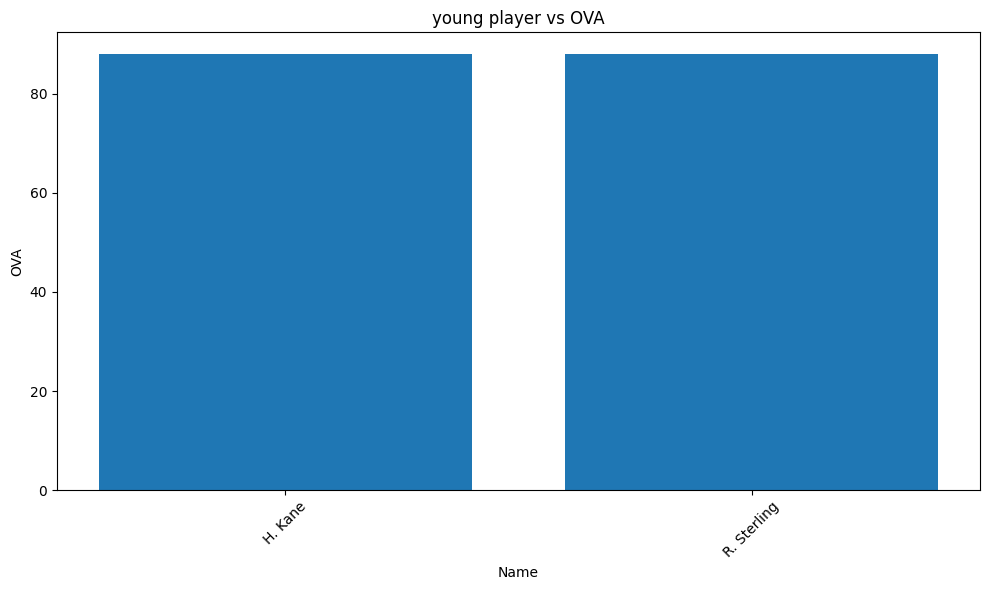

In [218]:
plt.figure(figsize=(10, 6))
plt.bar(min_age_max_OVA['Name'], min_age_max_OVA['OVA'])
plt.xlabel('Name')
plt.ylabel('OVA')
plt.title('young player vs OVA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [219]:
top_5_OVA_players =  england_players.nlargest(5, 'OVA')
top_5_OVA_players

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
3961,202126,H. Kane,26,88,England,Tottenham Hotspur,Central,89,74,196,...,71000000,220000,140200000,2172,424,382,130,367,2010,2024
4049,202652,R. Sterling,25,88,England,Manchester City,Winger,90,67,152,...,72500000,270000,139600000,2111,358,332,147,464,2015,2023
9212,231281,T. Alexander-Arnold,21,87,England,Liverpool,Defender,92,71,152,...,60000000,110000,115500000,2220,370,371,241,391,2015,2024
9633,233049,J. Sancho,20,87,England,Borussia Dortmund,Central,93,71,168,...,69500000,82000,132100000,1986,328,313,105,435,2017,2023
1869,183711,J. Henderson,30,86,England,Liverpool,Defender,86,72,176,...,36500000,140000,67500000,2220,399,394,244,354,2011,2023


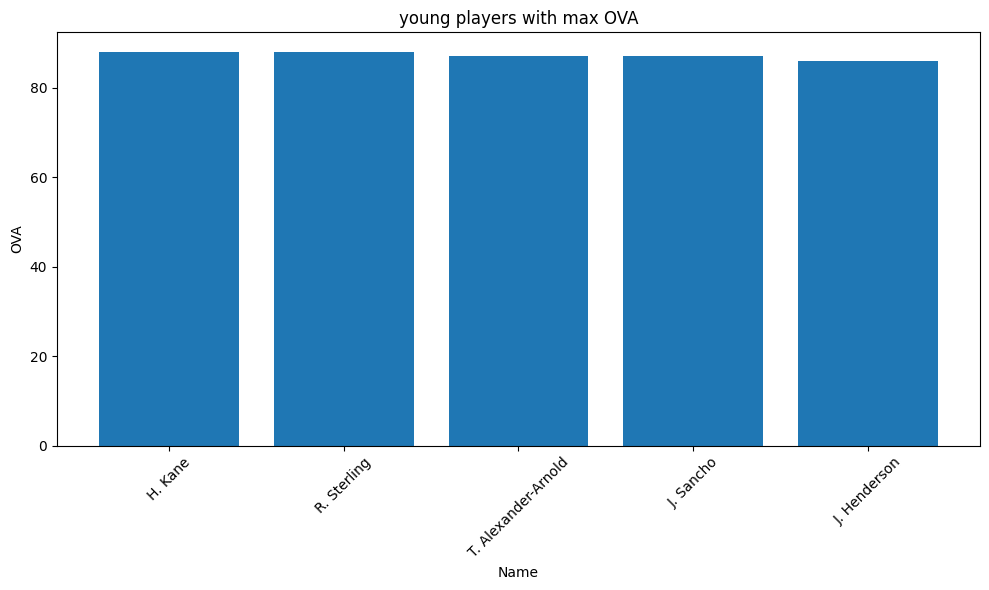

In [220]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_OVA_players['Name'], top_5_OVA_players['OVA'])
plt.xlabel('Name')
plt.ylabel('OVA')
plt.title('young players with max OVA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finding players with highest potential

In [221]:
max_potential = england_players['POT'].max()
youngest_max_potential_players = england_players[england_players['POT'] == max_potential]
youngest_max_potential_players = youngest_max_potential_players.sort_values(by='Age', ascending=True)

print(youngest_max_potential_players)

          ID       Name  Age  OVA Nationality               Club       BP  \
9633  233049  J. Sancho   20   87     England  Borussia Dortmund  Central   

      POT  Height  Weight  ...     Value   Wage  Release Clause  Total Stats  \
9633   93      71     168  ...  69500000  82000       132100000         1986   

      Power  Mentality  Defending  Movement  Contract Start Contract End  
9633    328        313        105       435            2017         2023  

[1 rows x 21 columns]


In [222]:
top_5_potential_players =  england_players.nlargest(5, 'POT')
top_5_potential_players

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
9633,233049,J. Sancho,20,87,England,Borussia Dortmund,Central,93,71,168,...,69500000,82000,132100000,1986,328,313,105,435,2017,2023
9212,231281,T. Alexander-Arnold,21,87,England,Liverpool,Defender,92,71,152,...,60000000,110000,115500000,2220,370,371,241,391,2015,2024
9317,231677,M. Rashford,22,85,England,Manchester United,Central,91,73,154,...,53000000,150000,111300000,2149,406,360,120,429,2014,2023
4049,202652,R. Sterling,25,88,England,Manchester City,Winger,90,67,152,...,72500000,270000,139600000,2111,358,332,147,464,2015,2023
3961,202126,H. Kane,26,88,England,Tottenham Hotspur,Central,89,74,196,...,71000000,220000,140200000,2172,424,382,130,367,2010,2024


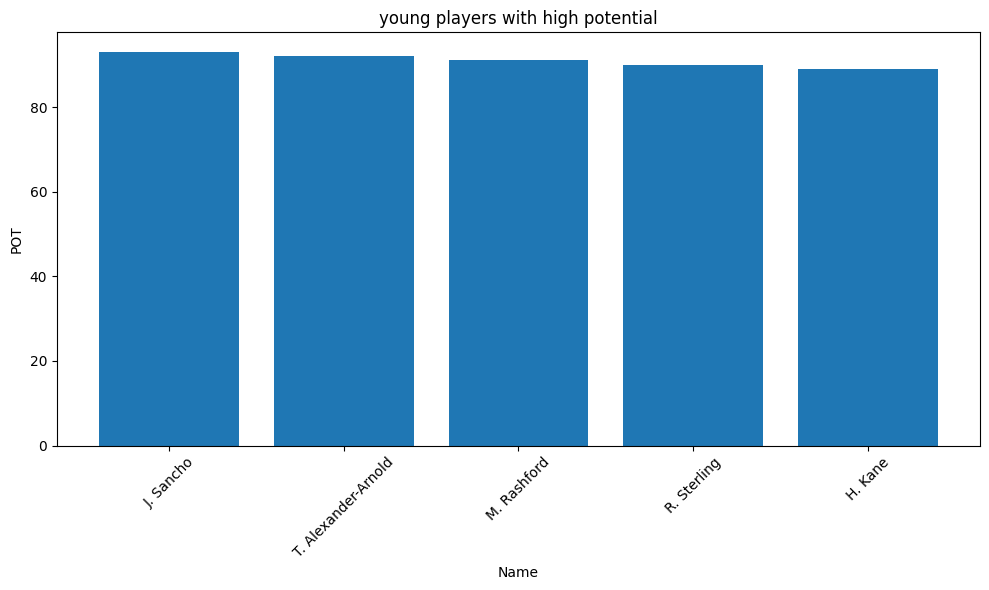

In [223]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_potential_players['Name'], top_5_potential_players['POT'])
plt.xlabel('Name')
plt.ylabel('POT')
plt.title('young players with high potential')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [224]:
young_high_potential_players = england_players[(england_players['Age'] < 20) & (england_players['POT'] >= 86)][['Name','Age','POT', 'Wage','OVA']]
young_high_potential_players

,Name,Age,POT,Wage,OVA
11790,C. Hudson-Odoi,19,86,41000,74
13576,M. Greenwood,18,89,33000,77
13720,B. Saka,18,88,22000,75
15004,J. Bellingham,17,88,3000,69
15763,N. Madueke,18,86,3000,70


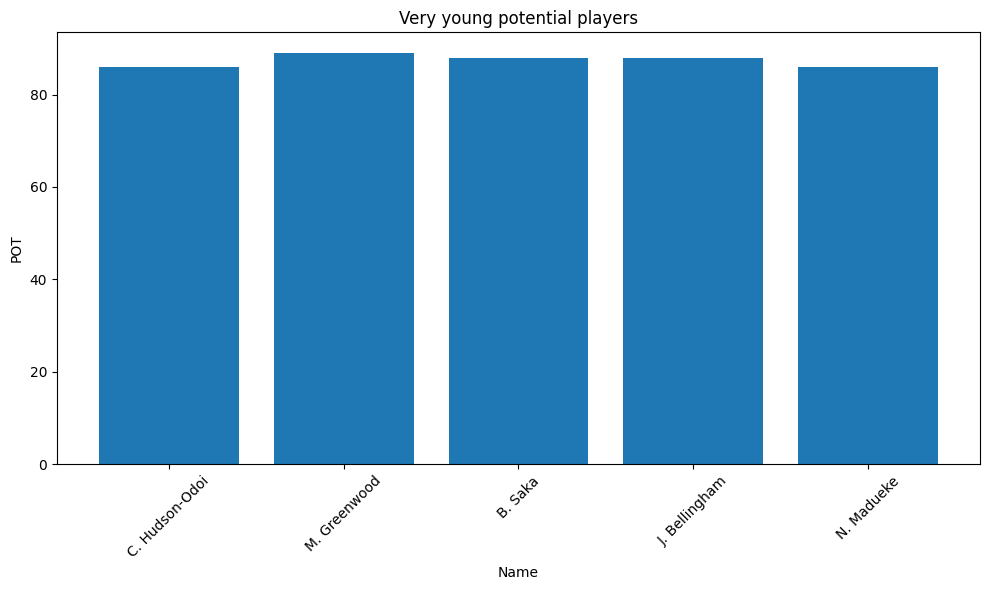

In [225]:
plt.figure(figsize=(10, 6))
plt.bar(young_high_potential_players['Name'], young_high_potential_players['POT'])
plt.xlabel('Name')
plt.ylabel('POT')
plt.title('Very young potential players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [226]:
old_top_5_potential_players =  england_players.nlargest(5, 'Age')
old_top_5_potential_players

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
277,53985,S. Royce,47,48,England,Gillingham,Goalkeeper,48,74,190,...,3000,700,5000,852,137,129,37,145,2019,2024
47,2702,K. Ellison,41,58,England,Newport County,Central,58,71,168,...,0,2000,0,1669,336,311,111,274,2020,2021
261,53352,D. Bulman,41,60,England,Crawley Town,Defender,60,69,165,...,0,1000,0,1593,337,277,172,234,2017,2021
233,50763,S. Harper,40,69,England,Sunderland,Goalkeeper,69,74,201,...,170000,4000,0,1158,209,169,37,230,2016,2016
629,151270,J. Coppinger,39,66,England,Doncaster Rovers,Central,66,67,143,...,170000,3000,298000,1783,346,288,120,320,2014,2021


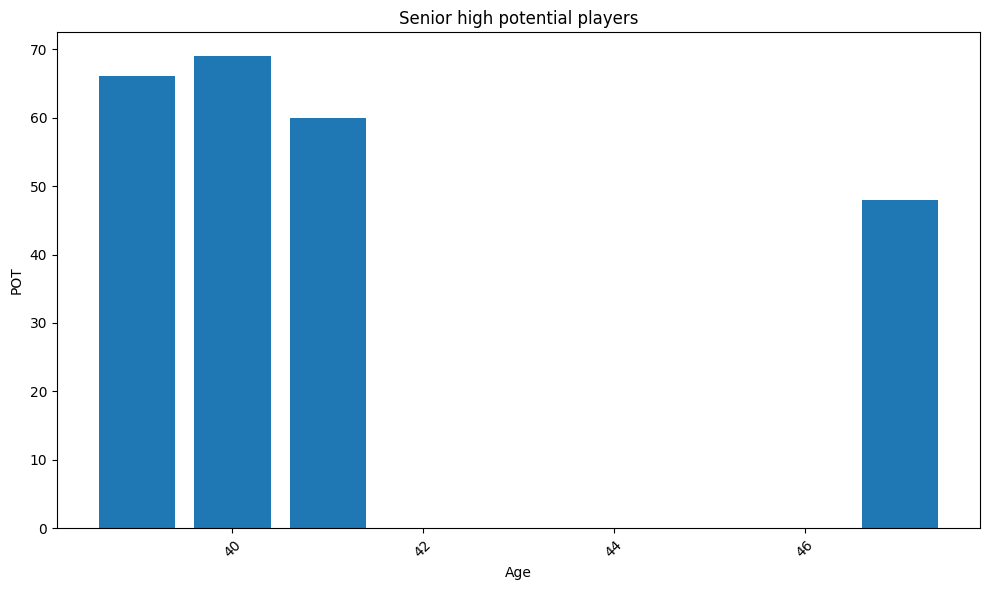

In [227]:
plt.figure(figsize=(10, 6))
plt.bar(old_top_5_potential_players['Age'], old_top_5_potential_players['POT'])
plt.xlabel('Age')
plt.ylabel('POT')
plt.title('Senior high potential players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finding highest wages

In [228]:
max_wage_player = england_players.loc[england_players['Wage'] == england_players['Wage'].max()]
max_wage_player

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
4049,202652,R. Sterling,25,88,England,Manchester City,Winger,90,67,152,...,72500000,270000,139600000,2111,358,332,147,464,2015,2023


In [229]:
min_wage_player = england_players.loc[england_players['Wage'] == england_players['Wage'].min()]
min_wage_player

,ID,Name,Age,OVA,Nationality,Club,BP,POT,Height,Weight,...,Value,Wage,Release Clause,Total Stats,Power,Mentality,Defending,Movement,Contract Start,Contract End
8,244,G. Neville B,35,76,England,Manchester United,Defender,82,70,174,...,0,0,0,1774,284,319,242,324,1991,2011
13,388,S. Campbell,35,75,England,Newcastle United,Defender,79,74,190,...,0,0,0,1581,319,296,222,321,2010,2011
111,11795,A. Stansfield,30,57,England,Exeter City,Central,63,71,170,...,0,0,0,1202,221,218,84,178,2010,NaN
264,53466,C. Palmer,29,59,England,Burton Albion,Central,59,67,154,...,80000,0,0,1670,313,260,154,352,2011,2013


In [230]:
potential_player_wages = england_players.sort_values('POT', axis = 0, ascending = False)[['Name','Age','POT', 'Wage','OVA']]
potential_player_wages

,Name,Age,POT,Wage,OVA
9633,J. Sancho,20,93,82000,87
9212,T. Alexander-Arnold,21,92,110000,87
9317,M. Rashford,22,91,150000,85
4049,R. Sterling,25,90,270000,88
13576,M. Greenwood,18,89,33000,77
...,...,...,...,...,...
3503,P. Hunt,25,56,2000,54
16813,J. Lawlor,29,56,2000,55
7740,J. Akintunde,24,55,550,48
277,S. Royce,47,48,700,48


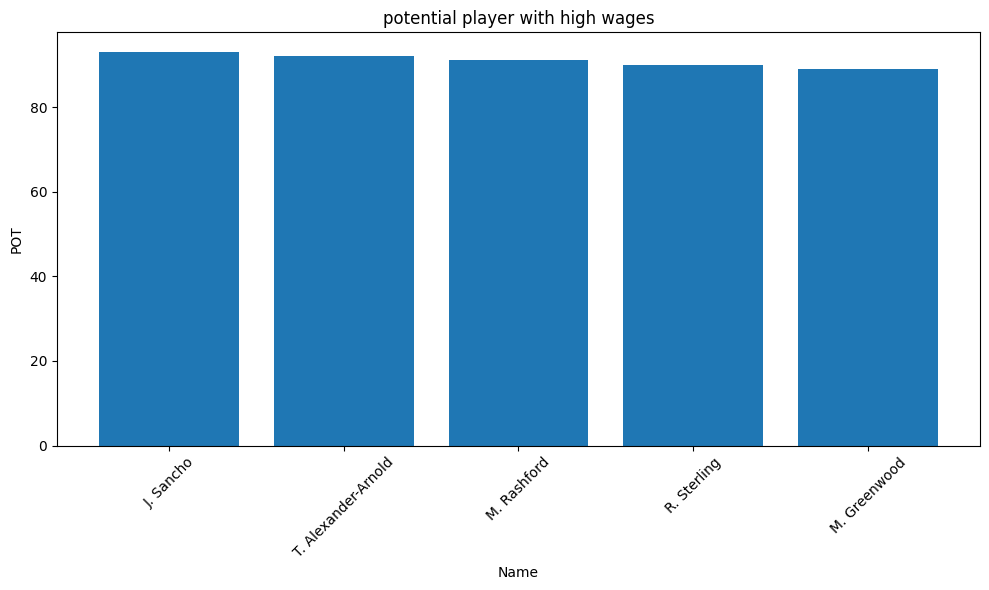

In [231]:
plt.figure(figsize=(10, 6))
plt.bar(potential_player_wages['Name'][:5], potential_player_wages['POT'][:5])
plt.xlabel('Name')
plt.ylabel('POT')
plt.title('potential player with high wages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()